This notebook is dedicated to calculating and predicting the average price of avocados using the "Average_Price" column as the target variable (or 'y'). The primary goal is to build and evaluate models that can accurately predict the average price based on various features within the dataset, specifically focusing on avocados from the New York City region.

To achieve this, we will use a deep learning framework, specifically a Long Short-Term Memory (LSTM) network, which is well-suited for capturing temporal dependencies in the data.

Using the deep learning models, the workflow will follow these steps:
- **Load Data:** IUsing the deep learning models, the workflow will follow these steps:mport the dataset and perform initial data inspection to understand its structure and contents.
- **Data Preprocessing:** Clean the data by handling missing values, encoding categorical variables, and normalizing numerical features where necessary.
- **Region Filter:** Filter the data to include only records from the New York City region.
- **Feature Selection:** Use all available features in the dataset for model training.
- **PCA:** To reduce dimensions of data features with good number of dimension.
- **Train-Test Split:** Divide the dataset into training and testing sets to evaluate model performance.
- **Model Training:** Train the LSTM model using the training data.
- **Model Evaluation:** Assess the performance of the trained model using various metrics.
- **Model 1 and 2:** Optimize model parameters model to improve accuracy and other performance metrics.
- **Final Evaluation:** Conduct a final evaluation of the tuned model on the test data.

For evaluating the performance of the model, the following metrics will be used:
- **Mean Absolute Error (MAE):** The average of the absolute differences between the predicted and actual values.
- **Mean Squared Error (MSE):** The average of the squared differences between the predicted and actual values.
- **R-squared (R²):** A statistical measure that represents the proportion of the variance for the target variable explained by the features.
- **Root Mean Squared Error (RMSE):** The square root of the average of the squared differences between the predicted and actual values.

By following these steps, we aim to develop a robust model that can accurately predict avocado prices, aiding retailers and distributors in setting competitive prices and optimizing their pricing strategies.

In [1]:
!nvcc -V && which nvcc

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Mon_Apr__3_17:16:06_PDT_2023
Cuda compilation tools, release 12.1, V12.1.105
Build cuda_12.1.r12.1/compiler.32688072_0
/opt/conda/bin/nvcc


In [2]:
!python --version
!nvidia-smi

Python 3.10.13
Sat Jul 27 11:44:37 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   40C    P8             12W /   70W |       1MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+--------------------------------

In [3]:
# !pip install cudf-cu12 --extra-index-url=https://pypi.nvidia.com # for cudas update

# Importing Libraries

In [4]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from matplotlib import pyplot

# Library for Encoding and Imputer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Library for Deep Learning Frameworks
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import LSTM, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.layers import *

2024-07-27 11:44:40.744104: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 11:44:40.744213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 11:44:40.872560: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/avocado-prices/avocado.csv


# Loading the Dataset

In [6]:
df = pd.read_csv("/kaggle/input/avocado-prices/avocado.csv")

## Dataset Information

In [7]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.describe()
# description of dataset

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [10]:
df.info(), df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


(None, (18249, 14))

In [11]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [12]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
print(cat_cols)

Index(['Date', 'type', 'region'], dtype='object')


In [13]:
for col in cat_cols:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for Date:
Date
2018-01-07    108
2017-01-22    108
2017-01-15    108
2017-01-08    108
2017-01-01    108
             ... 
2015-11-08    108
2015-11-01    108
2015-12-06    107
2017-06-25    107
2017-06-18    107
Name: count, Length: 169, dtype: int64
Counts for type:
type
conventional    9126
organic         9123
Name: count, dtype: int64
Counts for region:
region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Loui

In [14]:
num_cols = df.select_dtypes(include=['float', 'int64']).columns
print(num_cols)

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year'],
      dtype='object')


## Dealt with Null Values



In [15]:
missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
df[missing_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Empty DataFrame


# Feature Engineering & Indexing Datetime

In [16]:
df = df.drop(['Unnamed: 0'], axis=1)

In [17]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [18]:
df = df[df['region'] == 'NewYork']
df.head(100)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-01-04,1.93,17328.24,2357.18,12692.21,9.47,2269.38,2269.38,0.00,0.0,organic,2015,NewYork
2015-01-04,1.09,1402890.20,23641.00,1127882.44,1871.07,249495.69,178683.01,70812.68,0.0,conventional,2015,NewYork
2015-01-11,2.03,14817.97,1744.44,10901.43,60.93,2111.17,2111.17,0.00,0.0,organic,2015,NewYork
2015-01-11,1.34,1018225.83,15880.80,714530.70,2315.72,285498.61,221731.33,63767.28,0.0,conventional,2015,NewYork
2015-01-18,1.37,1044280.56,18945.56,749309.20,3039.37,272986.43,211934.06,61052.37,0.0,conventional,2015,NewYork
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-11-29,1.16,999169.64,13652.41,814571.57,863.58,170082.08,139508.76,30573.32,0.0,conventional,2015,NewYork
2015-12-06,1.20,1068971.54,15730.10,887708.08,892.62,164640.74,136643.23,27997.51,0.0,conventional,2015,NewYork
2015-12-06,1.65,18494.23,4117.08,7226.46,1106.58,6044.11,200.30,5843.81,0.0,organic,2015,NewYork


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 2015-01-04 to 2018-03-25
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  338 non-null    float64
 1   Total Volume  338 non-null    float64
 2   4046          338 non-null    float64
 3   4225          338 non-null    float64
 4   4770          338 non-null    float64
 5   Total Bags    338 non-null    float64
 6   Small Bags    338 non-null    float64
 7   Large Bags    338 non-null    float64
 8   XLarge Bags   338 non-null    float64
 9   type          338 non-null    object 
 10  year          338 non-null    int64  
 11  region        338 non-null    object 
dtypes: float64(9), int64(1), object(2)
memory usage: 34.3+ KB


<Axes: xlabel='Date'>

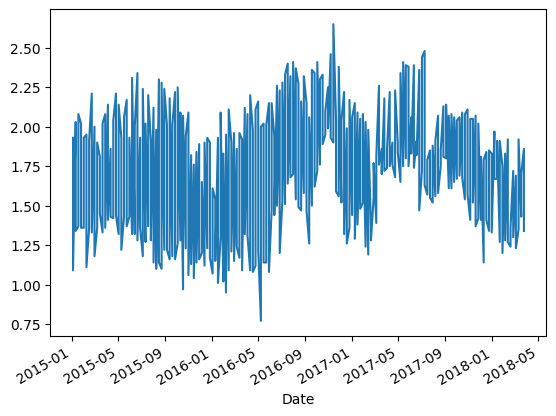

In [20]:
df['AveragePrice'].plot()

# Preprocessing (Scaling & Drop Cat-Cols)

i drop categorical columns, because of the complexcity of methods

In [21]:
list_num_cols = [ 'Total Volume', '4046', '4225', '4770', 'Total Bags',
                 'Small Bags', 'Large Bags', 'XLarge Bags', 'year']

list_drop_cats = df.select_dtypes(include=['object', 'category']).columns
df = df.drop(columns=list_drop_cats)

In [22]:
scaler = StandardScaler()
df[list_num_cols] = scaler.fit_transform(df[list_num_cols])

# Splitting Data & Sequencing Data

In [23]:
window_size = 5

def create_multivariate_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i + window_size].values)
        y.append(data.iloc[i + window_size]['AveragePrice']) 
    return np.array(X), np.array(y)

In [24]:
X, y = create_multivariate_sequences(df, window_size)
X.shape, y.shape

((333, 5, 10), (333,))

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 338 entries, 2015-01-04 to 2018-03-25
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  338 non-null    float64
 1   Total Volume  338 non-null    float64
 2   4046          338 non-null    float64
 3   4225          338 non-null    float64
 4   4770          338 non-null    float64
 5   Total Bags    338 non-null    float64
 6   Small Bags    338 non-null    float64
 7   Large Bags    338 non-null    float64
 8   XLarge Bags   338 non-null    float64
 9   year          338 non-null    float64
dtypes: float64(10)
memory usage: 29.0 KB


In [26]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, shuffle=False)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, shuffle=False)

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape 

((233, 5, 10), (233,), (50, 5, 10), (50,), (50, 5, 10), (50,))

# Long Short Time Memories (LSTM)

## Build Model 1

In [27]:
# Build simple model for LSTM
def build_model_lstm1():
    model = Sequential()
    model.add(InputLayer((5, 5))) # windows size
    model.add(LSTM(128))
    model.add(Dense(64, 'relu'))
    model.add(Dense(1, 'linear'))
    return model

model1 = build_model_lstm1()
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 76,929 (300.50 KB)

 Trainable params: 76,929 (300.50 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
# make checkpoint for each models has been compile

cp1 = ModelCheckpoint('model1.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [29]:
# Execute

history2 = model1.fit(
    X_train, y_train,
    epochs=100, 
    batch_size=16,
    validation_data=(X_val, y_val),
    shuffle=False,
    callbacks=[cp1]
)

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 2.4021 - root_mean_squared_error: 1.5476 - val_loss: 2.4460 - val_root_mean_squared_error: 1.5640
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3346 - root_mean_squared_error: 0.5765 - val_loss: 0.5224 - val_root_mean_squared_error: 0.7227
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.3379 - root_mean_squared_error: 1.1019 - val_loss: 0.6538 - val_root_mean_squared_error: 0.8086
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2757 - root_mean_squared_error: 0.5242 - val_loss: 0.0962 - val_root_mean_squared_error: 0.3101
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.7952 - root_mean_squared_error: 0.8400 - val_loss: 0.2078 - val_root_mean_squared_error: 0.4559
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1758 - root_mean_squared_error: 0.4188 - val_loss: 0.2301 - val_root_mean_squared_error: 0.4797
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss

In [30]:
from tensorflow.keras.models import load_model
model_pred1 = load_model('model1.keras')

In [31]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


,Train Predictions,Actuals
0,1.975779,2.08
1,1.628568,2.02
2,1.336903,1.36
3,1.644588,1.36
4,2.068003,1.93
...,...,...
228,1.629007,1.72
229,1.817503,1.74
230,1.921732,1.86
231,1.770724,2.22


In [32]:
print(f'Shape of train_predictions: {train_predictions.shape}')
print(f'Shape of y_train: {y_train.shape}')

Shape of train_predictions: (233,)
Shape of y_train: (233,)


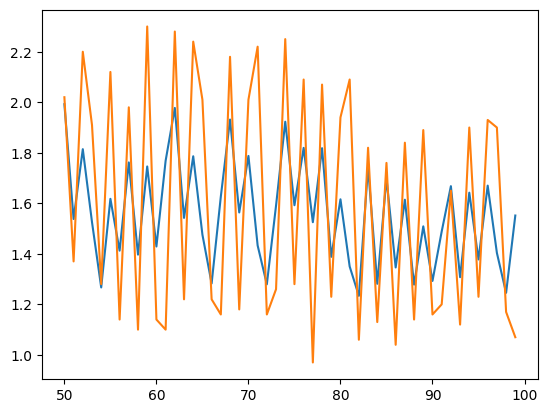

In [33]:
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [34]:
# Metrics Performance 

y_pred1 = model1.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred1)}')
print(f'MSE: {mean_squared_error(y_test, y_pred1)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred1))}')
print(f'R²: {r2_score(y_test, y_pred1)}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
MAE: 0.2292300394058227
MSE: 0.06861236783660372
RMSE: 0.2619396263198902
R²: 0.19055627502389283


## Build Model2

In [35]:
def build_model_lstm2():
    model = Sequential()
    model.add(InputLayer((5, 10))) # windows size and sum of features
    model.add(Conv1D(64, kernel_size=2, activation='relu'))
    model.add(Flatten())
    model.add(Dense(8, 'relu'))
    model.add(Dense(1, 'linear'))
    model.summary()
    return model

model2 = build_model_lstm2()
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 64)          │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 4, 64)          │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,409 (13.32 KB)

 Trainable params: 3,409 (13.32 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
cp2 = ModelCheckpoint('model1/model2.keras', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [37]:
history2 = model2.fit(
    X_train, y_train,
    epochs=100, 
    batch_size=16,
    validation_data=(X_val, y_val),
    shuffle=False,
    callbacks=[cp2]
)

Epoch 1/100
 1/15 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - loss: 1.6717 - root_mean_squared_error: 1.2929

I0000 00:00:1722080710.912129     112 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 1.0718 - root_mean_squared_error: 1.0277 - val_loss: 0.4596 - val_root_mean_squared_error: 0.6780
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3384 - root_mean_squared_error: 0.5806 - val_loss: 0.2624 - val_root_mean_squared_error: 0.5123
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2117 - root_mean_squared_error: 0.4590 - val_loss: 0.1787 - val_root_mean_squared_error: 0.4227
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1816 - root_mean_squared_error: 0.4257 - val_loss: 0.2257 - val_root_mean_squared_error: 0.4751
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1673 - root_mean_squared_error: 0.4088 - val_loss: 0.2190 - val_root_mean_squared_error: 0.4679
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1570 - root_mean_squared_error: 0.3961 - val_loss: 0.2367 - val_root_mean_squared_error: 0.4865
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1480 - 

In [38]:
train_predictions2 = model2.predict(X_train).flatten()
train_results2 = pd.DataFrame(data={'Train Predictions':train_predictions2, 'Actuals':y_train})
train_results2

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step


,Train Predictions,Actuals
0,1.877028,2.08
1,1.788357,2.02
2,1.162023,1.36
3,1.369172,1.36
4,1.950426,1.93
...,...,...
228,1.697070,1.72
229,1.819957,1.74
230,1.859937,1.86
231,2.237008,2.22


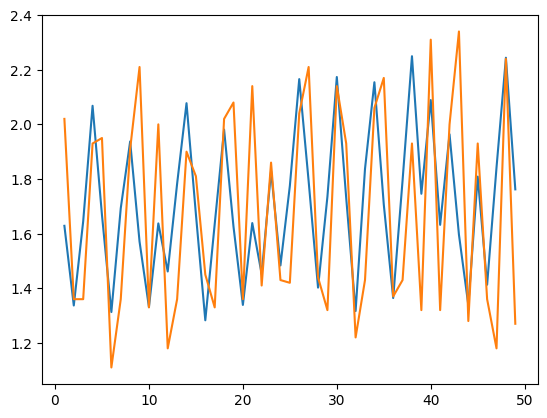

In [39]:
plt.plot(train_results['Train Predictions'][1:50])
plt.plot(train_results['Actuals'][1:50])

In [40]:
y_pred2 = model2.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred2)}')
print(f'MSE: {mean_squared_error(y_test, y_pred2)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'R²: {r2_score(y_test, y_pred2)}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
MAE: 0.510266684293747
MSE: 0.39303334379203697
RMSE: 0.6269237144916732
R²: -3.6367496687546037


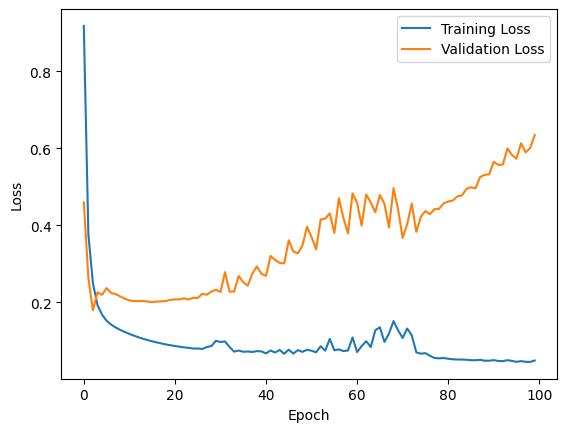

In [41]:
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Saving the Model

In [42]:
model1.save('model1.h5')
model2.save('model2.h5')

# Conclusion :

I think the modelf was really bad, from that we could see the Train Loss/Val Loss indicates the model was so overfit. Therefore, from metrics, the values we got was:

1. Model 1
- **Mean Absolute Error: 0.22**
- **Mean Square Error: 0.06**
- **R-Squared: 0.19**

1. Model 2
- **Mean Absolute Error:  0.51**
- **Mean Square Error: 0.393**
- **R-Squared: -3.63**

i think those values was bad, because of the data was so small, only **333** rows and features was **10**. Furthermore, the prices between day by day was so rigid or small movements, the model of LSTM can't calculate it clearly 